# Creating Word Vectors with word2vec

In this notebook, we create word vectors from a corpus of public-domain books, a selection from [Project Gutenberg](https://www.gutenberg.org/).

#### Load dependencies

In [1]:
# NL ToolKit
import nltk
from nltk import word_tokenize, sent_tokenize
# Word2Vec model
import gensim
from gensim.models.word2vec import Word2Vec
# for Dimentionnality reduction
from sklearn.manifold import TSNE
import pandas as pd
# for Interactive Vizualisation
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

C:\Users\009\Anaconda3\envs\PTHREE\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
nltk.download('punkt') 
# English-language sentence tokenizer (not all periods end sentences; not all sentences start with a capital letter)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\009\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Load data

In [4]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\009\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True

### loading the corpus

In [5]:
from nltk.corpus import gutenberg

### lenth of corpus=number of corpus elemnts

In [6]:
len(gutenberg.fileids())

18

### Exploring the fields of corpus

In [7]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

#### Tokenize text

### Tokenization of sentences

In [8]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

### result are returened as lists

In [9]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

### one sentence ie: list

In [10]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

### Tokinzing the words

In [11]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

### a look at the 10th element

In [12]:
word_tokenize(gberg_sent_tokens[1])[9]

'a'

### a convenient method that handles newlines, as well as tokenizing sentences and words in one shot

In [13]:
gberg_sents = gutenberg.sents()

### this method would support the \n

In [15]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [16]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [17]:
gberg_sents[4][9]

'a'

### another convenient method that we don't immediately need: not to have nested lists;

In [18]:
gutenberg.words() 

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

### gutenberg.words() is analogous to the following line, which need not be run: 

In [19]:
# word_tokenize(gutenberg.raw())

### our Gutenberg corpus is 2.6m words in length: 

In [20]:
len(gutenberg.words())

2621613

#### Run word2vec

### dimension=64, Skipgram (not default model but it's a small dataset), window size=10 left an right contexte words, filter min-acuurence= 5, for reproductbility = 42, Worekers= cores attributed to task 

In [24]:
    
#model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=8)

In [25]:
 #model.save('raw_gutenberg_model.w2v')

#### Explore model

## skip re-training the model with the next line, you can download the trained model

In [26]:
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

In [28]:
model['dog']

array([ -2.32959524e-01,   2.03816164e-02,  -1.67059049e-01,
         2.62354195e-01,   4.51078266e-01,   1.93299472e-01,
        -2.01621190e-01,  -1.33073583e-01,  -1.28507271e-01,
         1.20357744e-01,  -9.33840722e-02,   1.22282684e-01,
         4.90543008e-01,   6.09847903e-01,   6.13934286e-02,
         2.21259624e-01,   7.51708299e-02,  -5.81738874e-02,
         4.62525219e-01,  -5.84765315e-01,   1.85075969e-01,
        -3.33933622e-01,  -2.96420287e-02,   2.00595066e-01,
        -6.61042556e-02,   5.02966791e-02,   4.73389119e-01,
        -7.17739458e-04,   1.25085130e-01,  -2.52273917e-01,
        -3.76091748e-01,  -2.74534617e-02,  -2.06476003e-02,
        -1.44096777e-01,   3.26425999e-01,   2.65221894e-01,
         9.73609537e-02,   1.95859939e-01,  -2.53517389e-01,
         7.07951784e-01,   2.52430946e-01,   1.31554350e-01,
         5.40608680e-03,  -3.41503710e-01,  -3.60319763e-01,
        -1.98371977e-01,  -3.55750263e-01,   3.98555577e-01,
         1.84397846e-02,

### 64 values representing 'dog' location in 64 dimensionnal space

In [30]:
len(model['dog'])

64

In [31]:
model.most_similar('dog') # distance

[('puppy', 0.8258569240570068),
 ('broth', 0.7751373052597046),
 ('cow', 0.7590267658233643),
 ('sweeper', 0.7579753398895264),
 ('fox', 0.7569898962974548),
 ('pet', 0.7557868361473083),
 ('cage', 0.751981258392334),
 ('horse', 0.7506306171417236),
 ('Gingerbread', 0.7453705072402954),
 ('pig', 0.7451130151748657)]

In [32]:
model.most_similar('think')

[('suppose', 0.8583155870437622),
 ('know', 0.8466073274612427),
 ('manage', 0.8424623012542725),
 ('Mamma', 0.8190857172012329),
 ('NOW', 0.8169070482254028),
 ('imagine', 0.8156290054321289),
 ('interfere', 0.8101934790611267),
 ('contradict', 0.8074322938919067),
 ('believe', 0.804473876953125),
 ('want', 0.8015537261962891)]

In [33]:
model.most_similar('day')

[('time', 0.7700390815734863),
 ('morning', 0.7676112651824951),
 ('night', 0.7597821950912476),
 ('evening', 0.709557056427002),
 ('week', 0.7046887278556824),
 ('month', 0.685303807258606),
 ('feasting', 0.6837931871414185),
 ('morrow', 0.6823570728302002),
 ('Saturday', 0.6732362508773804),
 ('Adar', 0.6712368130683899)]

In [34]:
model.most_similar('father')

[('mother', 0.8732167482376099),
 ('brother', 0.8433570265769958),
 ('sister', 0.8258183598518372),
 ('daughter', 0.7881884574890137),
 ('Amnon', 0.7807689905166626),
 ('Tamar', 0.7657207250595093),
 ('uncle', 0.7550725936889648),
 ('wife', 0.7544764280319214),
 ('bondwoman', 0.7331217527389526),
 ('Michal', 0.721331000328064)]

### since the bible is the corpus, let see 'GOD':

In [35]:
model['god']

array([-0.3433429 , -0.15759762,  0.09541734,  0.12988947, -0.06515761,
        0.14990018, -0.04791199,  0.24365731, -0.19880478, -0.48012197,
       -0.01509677,  0.17962773, -0.41864109,  0.26588434,  0.10895146,
       -0.30602592,  0.04542162, -0.04402434,  0.61399615, -0.39355564,
        0.73572224, -0.37414673, -0.0273056 ,  0.43644288,  0.39128885,
        0.1712659 ,  0.0463801 ,  0.04287259,  0.35511479,  0.12290813,
       -0.41147703,  0.1072531 ,  0.14672278, -0.43242282,  0.33872592,
        0.14084688, -0.12014019,  0.70460844, -0.30121145,  0.16312507,
        0.20463757, -0.09036628,  0.01449974,  0.03908561, -0.08481006,
       -0.23114014,  0.08759928,  0.41548866,  0.24096267, -0.15385249,
       -0.04178151,  0.13491917, -0.18746965, -0.50809407,  0.36089301,
       -0.31103122,  0.14209695, -0.32924399, -0.74078339, -0.51511699,
        0.34035775, -0.03197264, -0.16089901, -0.29734635], dtype=float32)

In [36]:
model.most_similar('god')

[('Chemosh', 0.7188710570335388),
 ('goddess', 0.7168548703193665),
 ('ceaseth', 0.7063271999359131),
 ('deliverer', 0.6935092210769653),
 ('stumblingblock', 0.6931528449058533),
 ('Beelzebub', 0.684667706489563),
 ('molten', 0.6830761432647705),
 ('dunghill', 0.6821144819259644),
 ('covetous', 0.6801372766494751),
 ('deceitfully', 0.6756899356842041)]

In [37]:
model.doesnt_match("mother father daughter dog".split())

'dog'

In [38]:
model.similarity('father', 'dog')

0.50906610626766013

### arithmmetics : King - Man + Women = Queen
### close, but not quite; distinctly in female direction: the right is 'Mother' 

In [39]:
model.most_similar(positive=['father', 'woman'], negative=['man']) 

[('sister', 0.796367883682251),
 ('daughter', 0.7885696291923523),
 ('mother', 0.761225700378418),
 ('wife', 0.7449632287025452),
 ('husband', 0.7415164709091187),
 ('Rachel', 0.7151447534561157),
 ('Tamar', 0.713083028793335),
 ('brother', 0.6963298320770264),
 ('elder', 0.695830225944519),
 ('Hagar', 0.6902497410774231)]

In [40]:
# more confident about this one: 
model.most_similar(positive=['son', 'woman'], negative=['man']) 

[('daughter', 0.7488478422164917),
 ('Hagar', 0.7427021265029907),
 ('Rachel', 0.7339824438095093),
 ('Leah', 0.7329715490341187),
 ('Sarah', 0.7319811582565308),
 ('Esau', 0.7230588793754578),
 ('wife', 0.7220072746276855),
 ('Rebekah', 0.7159615159034729),
 ('Jesse', 0.7085567712783813),
 ('bare', 0.7058905959129333)]

In [41]:
model.most_similar(positive=['husband', 'woman'], negative=['man']) 

[('wife', 0.7320288419723511),
 ('sister', 0.7038279175758362),
 ('daughter', 0.6965077519416809),
 ('child', 0.6713101267814636),
 ('elder', 0.6446582674980164),
 ('adultery', 0.6441278457641602),
 ('conceived', 0.6422098875045776),
 ('widow', 0.6408833265304565),
 ('mother', 0.6399997472763062),
 ('maid', 0.6370999813079834)]

### extended to top 30 result

In [42]:
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=30) 

[('Rachel', 0.7291754484176636),
 ('Sarah', 0.7146686315536499),
 ('Esau', 0.6973822712898254),
 ('Leah', 0.697188138961792),
 ('Rebekah', 0.6948603391647339),
 ('Padanaram', 0.6945796608924866),
 ('Pharaoh', 0.6786428689956665),
 ('Hagar', 0.6784499287605286),
 ('Abram', 0.6773156523704529),
 ('Laban', 0.6734722852706909),
 ('Judah', 0.6718507409095764),
 ('Bilhah', 0.6700209379196167),
 ('Ephron', 0.6678472757339478),
 ('Bethuel', 0.664399266242981),
 ('daughter', 0.6610481142997742),
 ('damsel', 0.6563566327095032),
 ('David', 0.6543508768081665),
 ('Solomon', 0.652464747428894),
 ('Zilpah', 0.6513577699661255),
 ('Heth', 0.648700475692749),
 ('Canaan', 0.6485089063644409),
 ('Hamor', 0.647921621799469),
 ('queen', 0.647907018661499),
 ('Babylon', 0.6439951658248901),
 ('Onan', 0.6430028080940247),
 ('birthright', 0.6422896981239319),
 ('Shechem', 0.6378978490829468),
 ('Sarai', 0.6325186491012573),
 ('Lot', 0.6319773197174072),
 ('Hanun', 0.6319228410720825)]

### impressive for such a small data set, without any cleaning, e.g., to lower case (covered next)

#### Reduce word vector dimensionality with t-SNE: T-distributed stocastic embedding

### number of words ocuuring 5 times and more

In [44]:
len(model.wv.vocab)

17011

### converting from Dim=64 to specified dim, 

In [45]:
model.wv.vocab

{'lieutenant': <gensim.models.keyedvectors.Vocab at 0x164cbe80>,
 'overthrown': <gensim.models.keyedvectors.Vocab at 0x1459e6a0>,
 'Price': <gensim.models.keyedvectors.Vocab at 0x145bf0b8>,
 'imagination': <gensim.models.keyedvectors.Vocab at 0x145bf7f0>,
 'comical': <gensim.models.keyedvectors.Vocab at 0x145bf390>,
 'Trade': <gensim.models.keyedvectors.Vocab at 0x16571a20>,
 'gorgeous': <gensim.models.keyedvectors.Vocab at 0x16571588>,
 'Charlotte': <gensim.models.keyedvectors.Vocab at 0x145b3ef0>,
 'rascal': <gensim.models.keyedvectors.Vocab at 0x1407ccc0>,
 'TWO': <gensim.models.keyedvectors.Vocab at 0x175c3668>,
 'tongues': <gensim.models.keyedvectors.Vocab at 0x145b3ba8>,
 'conviction': <gensim.models.keyedvectors.Vocab at 0x175c3be0>,
 'adhering': <gensim.models.keyedvectors.Vocab at 0x14645198>,
 'disobey': <gensim.models.keyedvectors.Vocab at 0x175c32e8>,
 'Cherethites': <gensim.models.keyedvectors.Vocab at 0x175c3ef0>,
 'account': <gensim.models.keyedvectors.Vocab at 0x1650090

### for each word get the location in 64Dim

In [49]:
X = model[model.wv.vocab]

### creatinn an instance, 2 dimension, number of iterations, 

In [50]:
tsne = TSNE(n_components=2, n_iter=1000) # 200 is minimum iter; default is 1000

### conversion: fit_transform; took 23 min on 4gb, i5

In [51]:
X_2d = tsne.fit_transform(X)

In [52]:
X_2d[0:5]

array([[ -8.94729137,  13.41624832],
       [ 36.86876678,  -1.68953514],
       [-49.74100876, -15.03995037],
       [-45.85910797,  20.11854362],
       [ -5.66331911,   4.24963856]], dtype=float32)

### to Dataframe: creating DataFrame for storing results and plotting, 

In [ ]:
coords_df = pd.DataFrame(X_2d, columns=['x','y'])

### names of tokens; from keys

In [53]:
coords_df['token'] = model.wv.vocab.keys()

In [57]:
coords_df.head(15)

,x,y,token
0,-8.947291,13.416248,lieutenant
1,36.868767,-1.689535,overthrown
2,-49.741009,-15.039950,Price
3,-45.859108,20.118544,imagination
4,-5.663319,4.249639,comical
5,18.379606,34.439964,Trade
6,11.988487,-47.270573,gorgeous
7,-34.847233,36.944881,Charlotte
8,-10.034482,37.517273,rascal
9,-2.044367,54.474422,TWO


### saving the result for future runs

In [55]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

#### Visualize 2D representation of word vectors

In [58]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

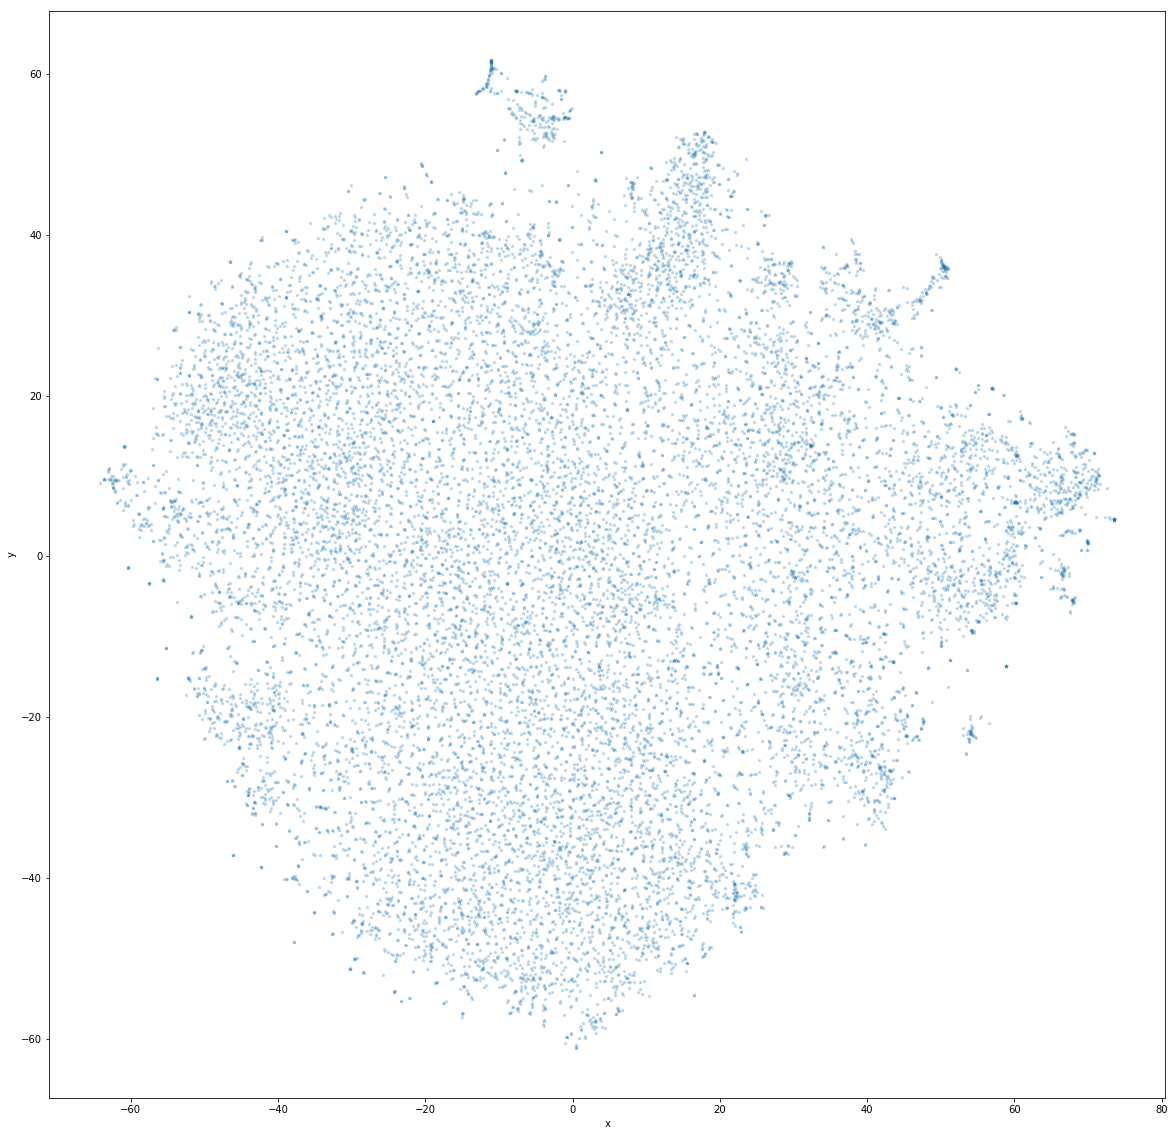

In [61]:
#"_" is a place holder, we plot a scatter plot, check the documentation "Shift+Tab" for different parameters,the results is 1700 words and the similarities ie: the ditances 
_ = coords_df.plot.scatter('x', 'y', figsize=(20,20), marker='*', s=10, alpha=0.2)

### Interactive vizualization with Boekeh

In [66]:
output_notebook() # output bokeh plots inline in notebook

Loading BokehJS ...

### for interactiveness we select the first 3000 words

In [63]:
subset_df = coords_df.sample(n=3000)

### add text to the plot in (x,y) position the text would be the correspanding Token ie Word

In [64]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [65]:
show(p)

### Remarques: 
there were no differnetioations between words starting with capital letters (Persons; beginings of sentences;...) and the normal lower case words
